<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/Covid_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is COVID-19?
---
*Source- World Health Organisation (https://www.who.int/health-topics/coronavirus#tab=tab_1)
---
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the disease and how the virus spreads. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.4 (estimated by Imperial College, London). See https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7751056/ for more information. R0 helps the governments across the world to estimate the future caseloads, to come up with interventions to avoid any unfavorable condition. An R0 above 1 means that the number of cases can have exponential growth rate around the world. Flattening the Curve typically implies even if the number of confirmed cases are increasing but the distribution of those cases will be over longer time giving health care bodies around the world time to act to save lives.

Like all living things, viruses mutate as well but are faster at mutating giving us all new challenges to deal with. Currently, the world is dealing with many variants of the Covid-19 virus but the spread is dominated by Omicron variant which is faster at the rate of infection (R0) than the other variants.
https://www.nature.com/articles/d41586-020-02544-6

#Objective of this notebook
---
* to study COVID-19 outbreak with the help of some basic visualizations techniques.
* particularly look at the current (March 2022) UK data on confirmed cases, hospitalisation and UK vaccination datas.
* understand the world-wide vaccination strategy using some analyses and visualisations.

#Data and sources
---
####**Daily confirmed cases as of 22 March 2022 in the UK**
The current daily updates on number of confirmed cases, new deaths etc are published by the official UK government website for data and insights on coronavirus (COVID-19) and can be found at

The number of confirmed cases by date reported in the UK can be found at 
https://coronavirus.data.gov.uk/details/cases?areaType=overview&areaName=United%20Kingdom

Data can be directly downloaded from:
https://api.coronavirus.data.gov.uk/v1/data
or
I have uploaded the csv data to my dataset folder at
https://github.com/JaySanthanam/Programming-for-data/blob/main/Datasets/UK_covid_data_2022-Mar-22.csv

####**Hospitalisation Data in the UK**
The number of confirmed cases by date reported in the UK can be found at 
https://coronavirus.data.gov.uk/details/healthcare
I have uploaded the csv data to my dataset folder at
https://github.com/JaySanthanam/Programming-for-data/blob/main/Datasets/data_2022-Mar-22_hospital.csv

####**UK Vaccine data**
UK vaccine data:
The country-wide vaccine data for the UK can be found at github (thanks to Lucas Rodés-Guirao) at 
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv

####**World-wide vaccine data**
World-wide vaccination data can be found on github (thanks to Lucas Rodés-Guirao) at 
https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv

We will be using data from these sources to do our analyses and visualisations. The first data is in json format (from API) while the next two are csv files and the last one is in Excel format.

# UK's current daily update
---

Let's study the current update on daily cases in the UK until today (23/03/2022). To do this we have to first upload the json data into pandas. So, let's import the necessary libraries (json, requests and pandas).

##Retrieve Data 

In [74]:
import json
import requests
import pandas as pd

Now let's read the json data and convert it to a dataframe to be used in pandas.

In [75]:

url = "https://api.coronavirus.data.gov.uk/v1/data"
response_API = requests.get(url)
data = response_API.text
parse_json = json.loads(data)
#parse_json
daily_UK_df = pd.json_normalize(parse_json['data'])

##Inspect data

We now have a pandas data frame. So let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [76]:
daily_UK_df.head()

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
0,2022-03-22,United Kingdom,K02000001,30431.4,94524,20413731,250.0,163929.0,244.4
1,2022-03-21,United Kingdom,K02000001,30290.8,226524,20319434,169.0,163679.0,244.0
2,2022-03-20,United Kingdom,K02000001,29954.4,0,20093762,0.0,163511.0,243.8
3,2022-03-19,United Kingdom,K02000001,29954.4,0,20093762,0.0,163511.0,243.8
4,2022-03-18,United Kingdom,K02000001,29954.4,90349,20093762,126.0,163511.0,243.8


In [77]:
daily_UK_df.tail()

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
777,2020-02-04,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
778,2020-02-03,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
779,2020-02-02,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
780,2020-02-01,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
781,2020-01-31,United Kingdom,K02000001,NaN,2,2,NaN,NaN,NaN


So we have data from 21/01/2020 to 22//03/2022 on number of confirmed cases daily (confirmedRate) and cummulative confirmed cases of covid-19 and number of new deaths and death rate.

In [78]:
daily_UK_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           782 non-null    object 
 1   areaName       782 non-null    object 
 2   areaCode       782 non-null    object 
 3   confirmedRate  752 non-null    float64
 4   latestBy       782 non-null    int64  
 5   confirmed      782 non-null    int64  
 6   deathNew       747 non-null    float64
 7   death          747 non-null    float64
 8   deathRate      738 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 55.1+ KB


That was our technical summary on data types. Let's get some stats now.

In [79]:
daily_UK_df.describe()

,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
count,752.000000,782.000000,7.820000e+02,747.000000,747.000000,738.000000
mean,7575.322872,25180.222506,4.886674e+06,217.894244,95003.619813,143.352710
std,7998.103847,33594.786815,5.351055e+06,299.985287,49967.377484,73.268763
min,0.100000,0.000000,2.000000e+00,0.000000,1.000000,0.100000
25%,512.425000,2440.500000,3.152870e+05,27.000000,41590.000000,62.100000
50%,6328.100000,12942.500000,4.149570e+06,111.000000,125516.000000,187.800000
75%,10911.025000,37185.000000,7.084970e+06,260.500000,134894.000000,201.575000
max,30431.400000,226524.000000,2.041373e+07,1820.000000,163929.000000,244.400000


This tells us that so far there has been an average of 25180 confirmed Covid-19 cases per day in the UK since 31/01/2020 with a maximum of 226524 confirmed cases reported on a single day. 

###When was the maximum number of confirmed cases per day reported?

In [80]:
daily_UK_df[daily_UK_df['latestBy']==daily_UK_df['latestBy'].max()]

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
1,2022-03-21,United Kingdom,K02000001,30290.8,226524,20319434,169.0,163679.0,244.0


###When was the maximum number of covid-related deaths per day reported?

In [81]:
daily_UK_df[daily_UK_df['deathNew']==daily_UK_df['deathNew'].max()]

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
426,2021-01-20,United Kingdom,K02000001,5226.1,38905,3505754,1820.0,93290.0,139.1


##Clean and sort data

Let's drop the column 'areacode' and 'areaName'. We know that this is UK data. There is no point in keeping those two columns.

In [ ]:
#Dropping columns
daily_UK_df.drop(["areaCode"],1,inplace=True)
daily_UK_df.drop(["areaName"],1,inplace=True)

Did this work?

In [112]:
daily_UK_df.head()

,date,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
0,2022-03-22,30431.4,94524,20413731,250.0,163929.0,244.4
1,2022-03-21,30290.8,226524,20319434,169.0,163679.0,244.0
2,2022-03-20,29954.4,0,20093762,0.0,163511.0,243.8
3,2022-03-19,29954.4,0,20093762,0.0,163511.0,243.8
4,2022-03-18,29954.4,90349,20093762,126.0,163511.0,243.8


##Explore the data
---
Now, let's use the data to gain an understanding of what is happening with the Covid-19 cases in the UK.

###Daily confirmed covid cases using a line plot.

Let's visualise the number of cases recorded each day in the UK since 31/01/2020.

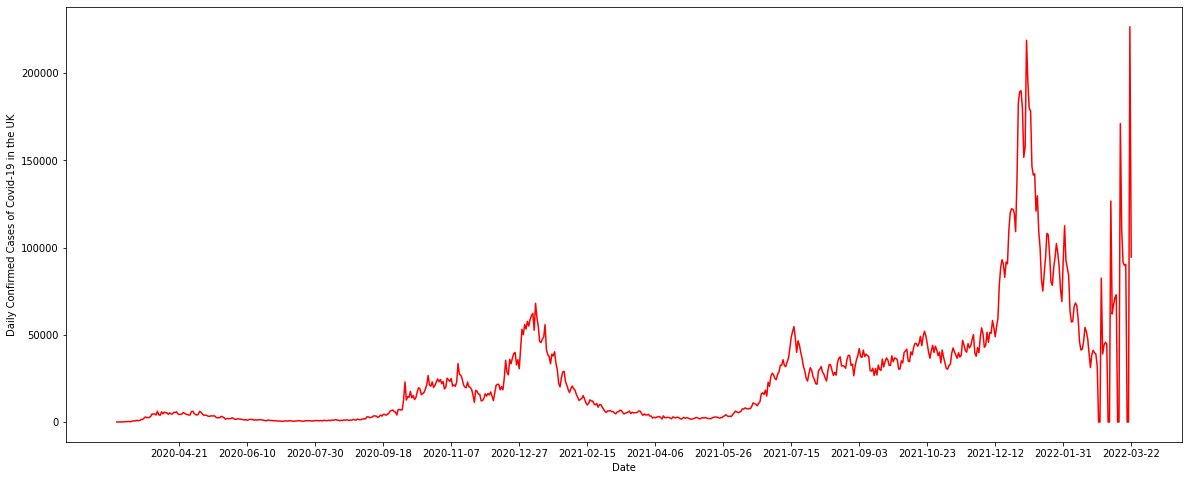

In [83]:
import matplotlib  
import matplotlib.pyplot as plt
import numpy as np
def do_line_plot(x,y,x_label,y_label):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x, y, color='r')
  ax.invert_xaxis()
  ax.set_xticks(ax.get_xticks()[::50])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()
  return

data = daily_UK_df.dropna(subset = ['date','latestBy','confirmed','deathNew','death'])
date = np.array(data['date'])
daily_cases = np.array(data['latestBy'])

do_line_plot(date,daily_cases,"Date","Daily Confirmed Cases of Covid-19 in the UK")


###Cumulative number of confirmed cases of Covid-19 in the UK

Often, it helps to know the total number of cases to date to get an overall picture. So let's look at the cummulative number of case - this is given in the column 'confirmedRate' of the dataframe.

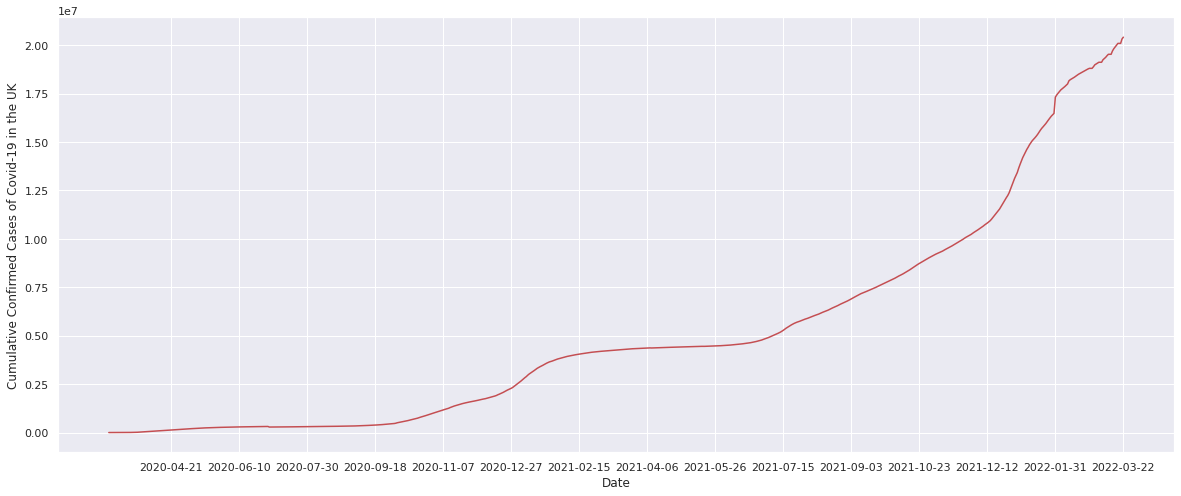

In [93]:
cumm_cases = np.array(data['confirmed'])
do_line_plot(date,cumm_cases,"Date","Cumulative Confirmed Cases of Covid-19 in the UK")

Epidemiologists use lograthmic scale for cumulative cases to estimate R0 (which helps us get an idea of how many more cases to expect). So let's plot our data in lograthmic scale for the y-axis (the cummulative cases).

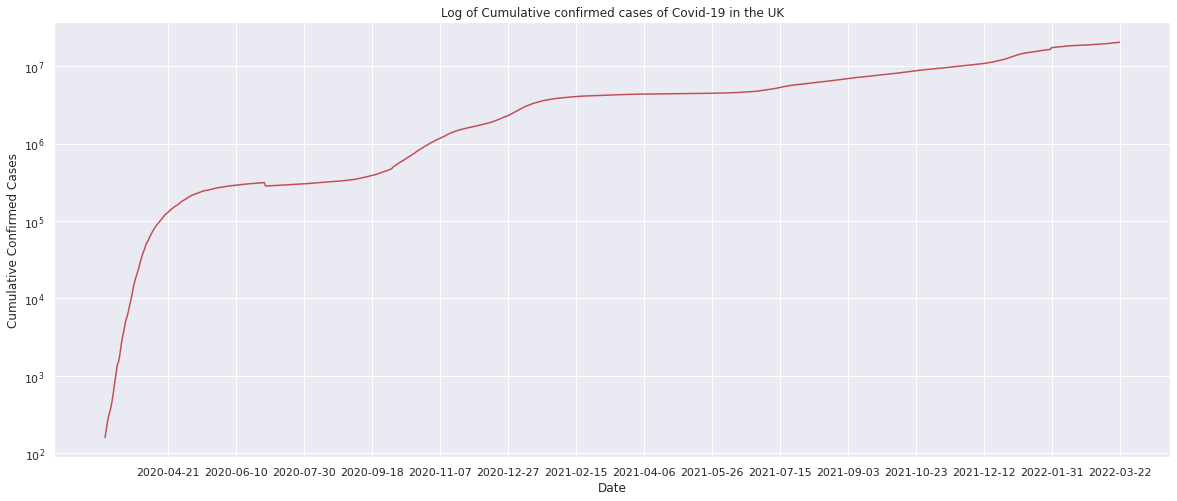

In [95]:
def do_log_lineplot(x,y,x_label,y_label,title):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(date,cumm_cases, color='r')
  ax.invert_xaxis()
  ax.set_yscale('log')
  ax.set_xticks(ax.get_xticks()[::50])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()
  return

do_log_lineplot(date,cumm_cases,"Date","Cumulative Confirmed Cases","Log of Cumulative confirmed cases of Covid-19 in the UK")

The slope of this graph is usually used to estimate the R0.

###Daily reported Covid-related deaths

Currently, the number of cases are clearly increasing. But, the main concern for the government all over the world is to keep the number of covid related deaths to a minimum. Let's take a look at the number of daily reported covid-related deaths from the data.

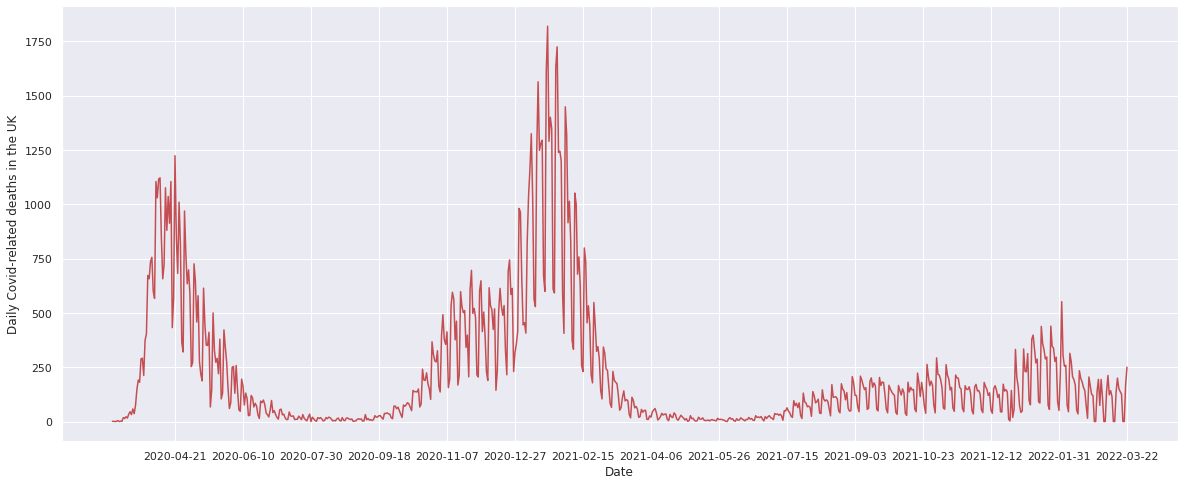

In [97]:
daily_deaths = np.array(data['deathNew'])

do_line_plot(date,daily_deaths,"Date","Daily Covid-related deaths in the UK")


So, from the above graph we can see that although the confirmed Covid-cases are raising, the number of covid-related deaths are being kept as low as possible, given the circumstances. 

It will be useful to see both the number of cases and the number of deaths together in one graph, so let's take a look.

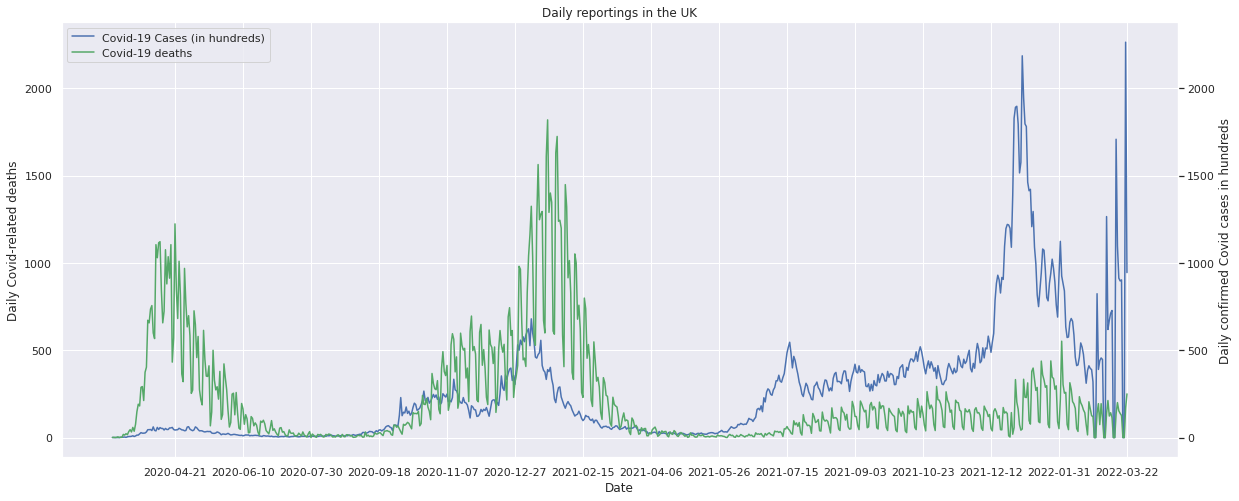

In [151]:
def visualise_multiaxes_plots(x_array1,y_array1,y_array2,x_label,y_label,plot_title,label1,label2):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x_array1, y_array1, 'b', label=label1)
  ax.plot(x_array1, y_array2, 'g', label=label2)
  ax.invert_xaxis()
  ax.set_xticks(ax.get_xticks()[::50])
  secax = ax.secondary_yaxis('right', functions=None)
  secax.set_ylabel('Daily confirmed Covid cases in hundreds')
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

cases_hundreds = daily_cases//100
visualise_multiaxes_plots(date,cases_hundreds,daily_deaths,"Date","Daily Covid-related deaths","Daily reportings in the UK","Covid-19 Cases (in hundreds)","Covid-19 deaths")

We can clearly see that despite the large increase in number of cases, the number of deaths are lower than before.

###Cumulative reported Covid-related deaths

Again, to get an overall picture of number of Covid-related deaths since the 31/01/2020, let's look at the cumulative number of Covid-related deaths - given in the column, 'death'

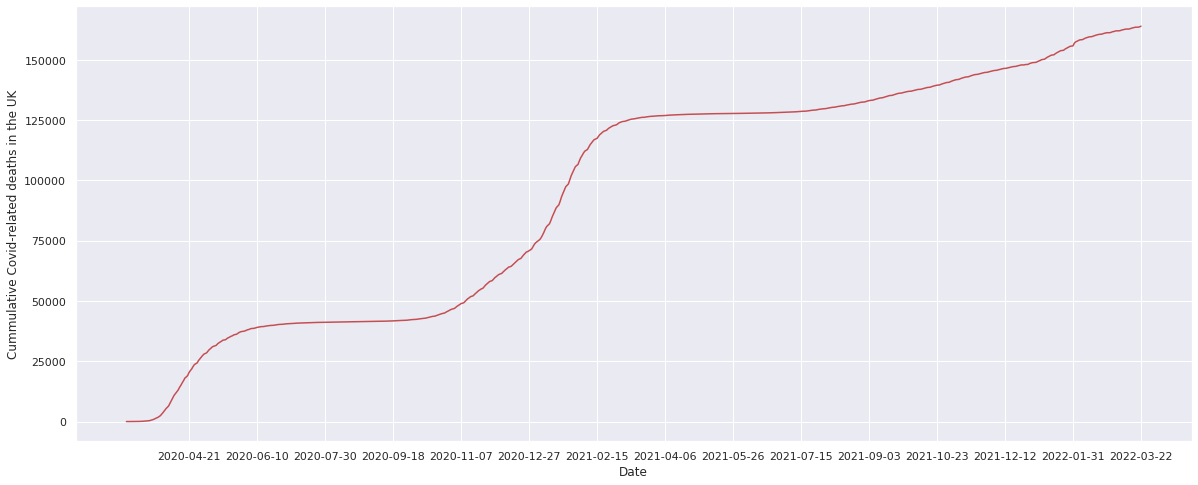

In [111]:
cumm_death = np.array(data['death'])
do_line_plot(date,cumm_death,"Date","Cummulative Covid-related deaths in the UK")

Unfortunatley, we have lost more than 150,000 people in the Uk due to Covid-19 since 31/01/2020.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


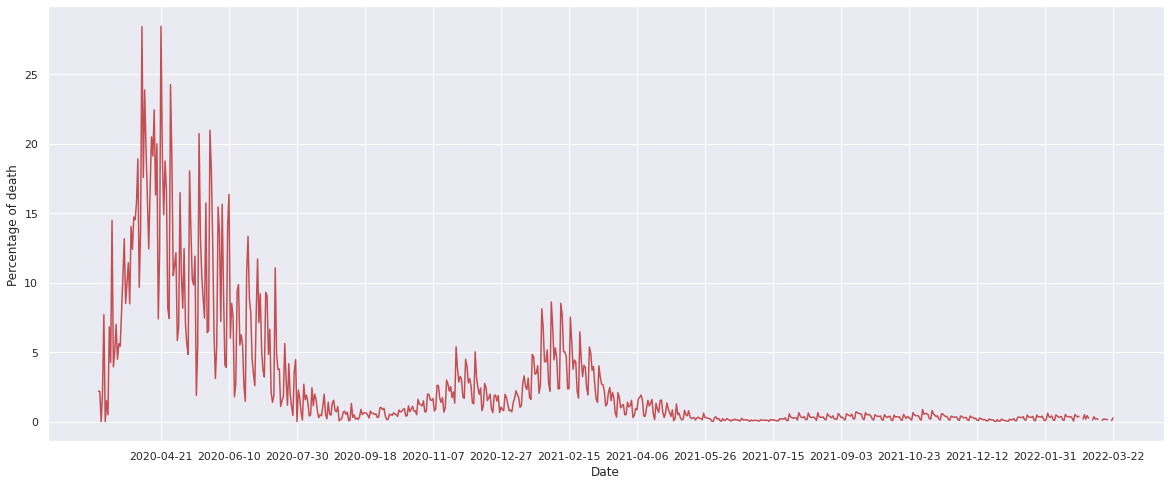

In [132]:
percentage_death = (daily_deaths/daily_cases)*100
do_line_plot(date,percentage_death,"Date","Percentage of death")

**I'm aware of the warning "invalid value encountered in true_divide" is due to 0 cases recorded in some days.**

The above the graph shows that the percentage of people tested who dies of Covid-19 (confirmed cases) has been going down and it is quite smaller now compared to the beginning of teh pandemic.

#Hospitalisation Data in the UK
---
One of the things many of us are worried about next to keeping the Covid-related deaths to a minimum is to keep the Covid-related hospitalisation down. Next, let's look at the Hospitalisation data in the UK. This data has been uploaded to my datasets folder as a csv file which can be found at https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/data_2022-Mar-22_hospital.csv

## Retreive Data

In [115]:
def get_csv_data(url):
  df = pd.read_csv(url)
  return df

url = "https://raw.githubusercontent.com/JaySanthanam/Programming-for-data/main/Datasets/data_2022-Mar-22_hospital.csv"
hosp_df = get_csv_data(url)

##Inspect data
---
Let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [116]:
hosp_df.head()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,18/03/2022,1879,768272
1,overview,United Kingdom,K02000001,17/03/2022,2004,766393
2,overview,United Kingdom,K02000001,16/03/2022,2067,764389
3,overview,United Kingdom,K02000001,15/03/2022,2077,762322
4,overview,United Kingdom,K02000001,14/03/2022,1946,760245


In [117]:
hosp_df.tail()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
721,overview,United Kingdom,K02000001,27/03/2020,2229,12839
722,overview,United Kingdom,K02000001,26/03/2020,1931,10610
723,overview,United Kingdom,K02000001,25/03/2020,2087,8679
724,overview,United Kingdom,K02000001,24/03/2020,1718,6592
725,overview,United Kingdom,K02000001,23/03/2020,1273,4874


This means we have hospitalisation data from 23/03/2020 to 18/03/2022

In [118]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaType       726 non-null    object
 1   areaName       726 non-null    object
 2   areaCode       726 non-null    object
 3   date           726 non-null    object
 4   newAdmissions  726 non-null    int64 
 5   cumAdmissions  726 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 34.2+ KB


There are no null values.

In [119]:
hosp_df.describe()

,newAdmissions,cumAdmissions
count,726.000000,726.000000
mean,1053.265840,379168.404959
std,893.021901,211499.910103
min,73.000000,4874.000000
25%,301.000000,139857.750000
50%,864.000000,455455.000000
75%,1490.250000,540074.250000
max,4580.000000,768272.000000


Average daily Covid-related hospital admissions is 1053 with a maximum of 4580 in one day. From 23/03/2020 to 18/03/2022 (nearly 2 years) we have had 379,168 total Covid-related hospital admissions.

When did we have the maximum hospital admission for covid-related cases.

In [120]:
hosp_df[hosp_df['newAdmissions']==hosp_df['newAdmissions'].max()]

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
430,overview,United Kingdom,K02000001,12/01/2021,4580,336431


The 12/01/2021 had the highest covid-related hospital admissions of 4580 people.

##Clean and sort Data
---
Again there are som unnecessary columns: 'areaType', 'areaName', 'areaCode'. So, we can drop them for future use.

In [121]:
hosp_df.drop(['areaType', 'areaName','areaCode' ], axis = 1)

,date,newAdmissions,cumAdmissions
0,18/03/2022,1879,768272
1,17/03/2022,2004,766393
2,16/03/2022,2067,764389
3,15/03/2022,2077,762322
4,14/03/2022,1946,760245
...,...,...,...
721,27/03/2020,2229,12839
722,26/03/2020,1931,10610
723,25/03/2020,2087,8679
724,24/03/2020,1718,6592


##Explore the data
---

###Daily covid-related hospitalisation using a line plot.

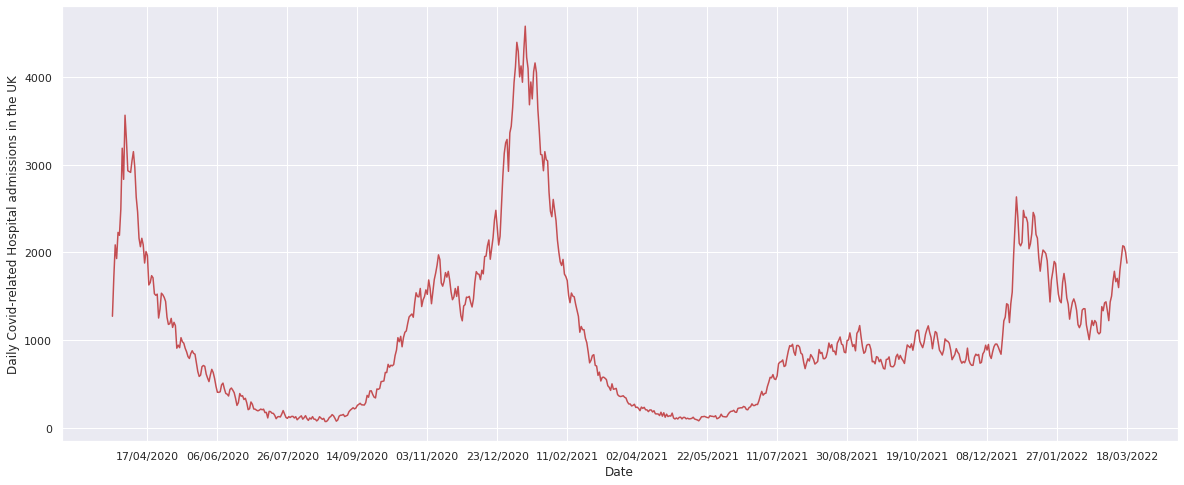

In [135]:
hosp_date = np.array(hosp_df['date'])
hosp_daily = np.array(hosp_df['newAdmissions'])

do_line_plot(hosp_date,hosp_daily,"Date","Daily Covid-related Hospital admissions in the UK")


This shows the hospitalisation trend for Covid-19 patients in the UK.

###Cumulative covid-related hospitalisation using a line plot.

This would tell us the total hospitalisation since March 2020.

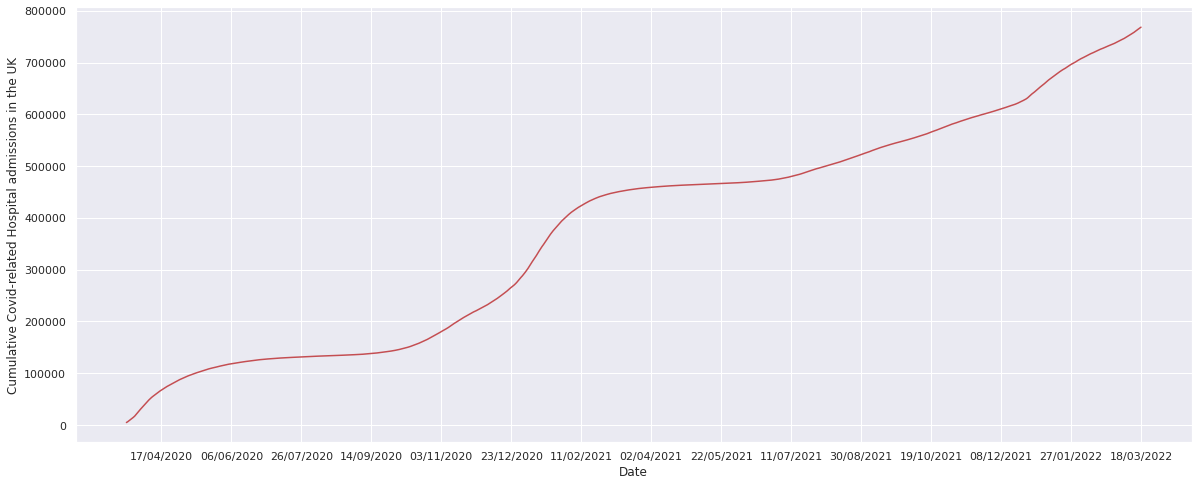

In [138]:

hosp_cum = np.array(hosp_df['cumAdmissions'])

do_line_plot(hosp_date,hosp_cum,"Date","Cumulative Covid-related Hospital admissions in the UK")

The hospitalisation graph is still showing an increasing trend.

#Vaccination Data in the UK
---

One of the intervention strategies used by many governments across the world is vaccination programmes. Let's take a look at the UK's vaccination data to get an understanding. The country-wide vaccine data for the UK can be found at github at https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv

##Retrieve Data

We already have a function to read csv data from an url. So let's use it.

In [139]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/United%20Kingdom.csv"
vacc_uk_df = get_csv_data(url)

##Inspect Data

Let's look at the top 5 rows, last 5 rows the descriptive and technical summary to get a better idea of what the data looks like.

In [140]:
vacc_uk_df.head()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,United Kingdom,2021-01-10,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,2677971,2286572,391399,NaN
1,United Kingdom,2021-01-11,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,2843815,2431648,412167,NaN
2,United Kingdom,2021-01-12,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3067541,2639309,428232,NaN
3,United Kingdom,2021-01-13,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3356229,2918252,437977,NaN
4,United Kingdom,2021-01-14,"Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,3678180,3234946,443234,NaN


In [141]:
vacc_uk_df.tail()

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
431,United Kingdom,2022-03-17,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140591877,52725660,49269524,38596693.0
432,United Kingdom,2022-03-18,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140631013,52730003,49284165,38616845.0
433,United Kingdom,2022-03-19,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140680847,52740240,49303269,38637338.0
434,United Kingdom,2022-03-20,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140708434,52747246,49312977,38648211.0
435,United Kingdom,2022-03-21,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",https://coronavirus.data.gov.uk/details/vaccin...,140742414,52751751,49325037,38665626.0


So, we have vaccination data from 10/01/2021 to 21/03/2022.


In [142]:
vacc_uk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 436 non-null    object 
 1   date                     436 non-null    object 
 2   vaccine                  436 non-null    object 
 3   source_url               436 non-null    object 
 4   total_vaccinations       436 non-null    int64  
 5   people_vaccinated        436 non-null    int64  
 6   people_fully_vaccinated  436 non-null    int64  
 7   total_boosters           173 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 27.4+ KB


We have some null values in the boosters column.

In [143]:
vacc_uk_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
count,4.360000e+02,4.360000e+02,4.360000e+02,1.730000e+02
mean,8.258332e+07,4.110488e+07,3.150259e+07,2.514146e+07
std,4.190413e+07,1.354322e+07,1.827439e+07,1.359234e+07
min,2.677971e+06,2.286572e+06,3.913990e+05,8.682020e+05
25%,4.859861e+07,3.418597e+07,1.441264e+07,1.218142e+07
50%,8.812434e+07,4.735156e+07,4.077278e+07,3.247034e+07
75%,1.170562e+08,5.105195e+07,4.647009e+07,3.755342e+07
max,1.407424e+08,5.275175e+07,4.932504e+07,3.866563e+07


This tells us that an average of 4.110488e+07 people have been vaccinated with  3.150259e+07 of them receiving 2 doses of vaccination and 2.514146e+07 have been given the booster.

#Explore the data

##Daily Vaccination rates (line plot)

We had written a function to do line plot but had reversed the x-axis since the data had dates in reverse order. Here we will do a line-plot function with no axis reversal.

In [157]:
def do_lineplot_noreverse(x,y,x_label,y_label):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x, y, color='r')
  ax.set_xticks(ax.get_xticks()[::50])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()
  return

What does the trend in the number of vaccination look like?

In [162]:
def visualise_multiple_plots(x_array1,y_array1,y_array2,x_label,y_label,plot_title,label1,label2):
  fig = plt.figure(figsize=(20, 8))
  ax=plt.gca()
  ax.plot(x_array1, y_array1, 'b', label=label1)
  ax.plot(x_array1, y_array2, 'g', label=label2)
  ax.set_xticks(ax.get_xticks()[::50])
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(plot_title)
  plt.show()
  return

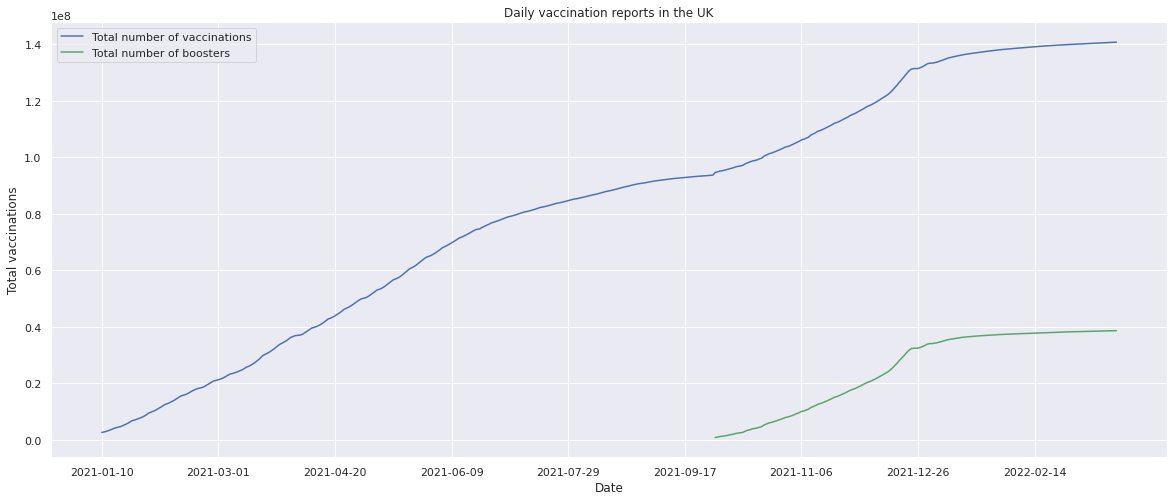

In [165]:
vacc_date = np.array(vacc_uk_df['date'])
vacc_daily = np.array(vacc_uk_df['total_vaccinations'])
vacc_booster = np.array(vacc_uk_df['total_boosters'])

visualise_multiple_plots(vacc_date,vacc_daily,vacc_booster,"Date","Total vaccinations","Daily vaccination reports in the UK","Total number of vaccinations","Total number of boosters")

The daily vaccinations have been increasing but is starting to slow down now. The booster vaccination started later in September 2021 and hasn't reached nearly the same rate as expected vaccinations before starting to slow down. 

How many are vaccinated and how many are fully vaccinated?

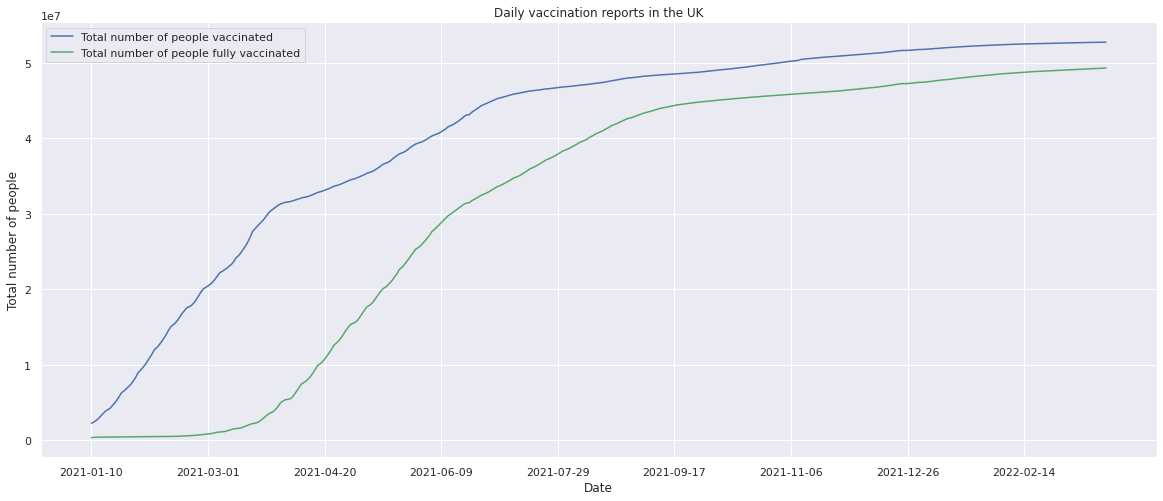

In [167]:
peop_vacc = np.array(vacc_uk_df['people_vaccinated'])
peop_full_vacc = np.array(vacc_uk_df['people_fully_vaccinated'])
visualise_multiple_plots(vacc_date,peop_vacc,peop_full_vacc,"Date","Total number of people","Daily vaccination reports in the UK","Total number of people vaccinated","Total number of people fully vaccinated")

The number of people fully vaccinated is still lower than total number of people vaccinated, but, is slowly catching up. We can clearly see the 3 months gap between vaccine doses.

##What are the vaccines that were used in the UK?

In [172]:
uk_vacc_manu = vacc_uk_df.groupby(["vaccine"]).sum()
uk_vacc_manu

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
vaccine,,,,
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",34351156708,16389976518,13611707859,4.349472e+09
"Oxford/AstraZeneca, Pfizer/BioNTech",1655168829,1531749079,123419750,0.000000e+00


Clearly, the manufacturers' names are clumped together with no way of separating them.

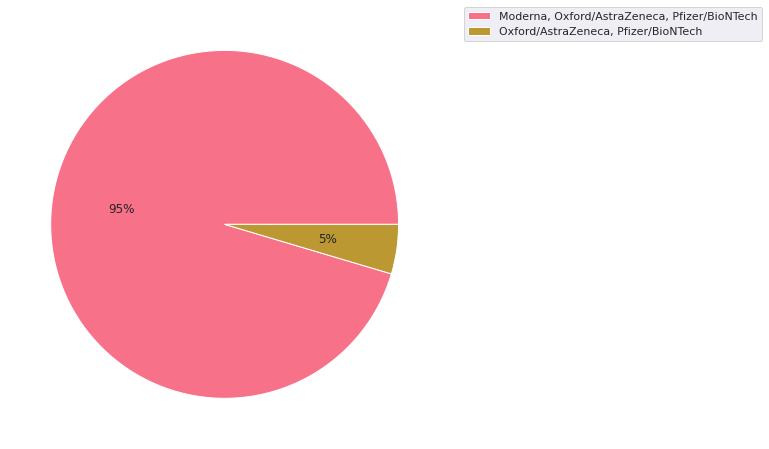

In [173]:
import seaborn as sns

def do_pie_plot(x,y):
  plt.figure(figsize = (10,8))
  sns.set(style="darkgrid")
  colors = sns.color_palette('husl')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return


x = uk_vacc_manu.index.tolist()
y = uk_vacc_manu['total_vaccinations']
do_pie_plot(x,y)

Since we cannot separate the vaccine manufacturers, this chart isn't as useful as hoped for!

#Vaccination data world-wide
---
It will be a good idea to have an idea of how the rest of the world is doing with the vaccinations and compare it to the UK. The world wide vaccination data can be found on github at 

https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true



##Retrieve Data

The world-wide data is in excel format. So, we will need a function to read Excel data from an url.

In [174]:
def get_excel_data(url, string):
  df = pd.read_excel(url,sheet_name= string)
  return df

url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"
world_vacc = get_excel_data(url, 'by_country')

## Inspect the data 
---

One of the challenges in looking at world-wide data is that some columns might be missing values. so the data needs ot be cleaned and sorted.
1. Find out which columns have missing values


Use .info() for technical summary.

**Expected output:**
```
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
    Column                               Non-Null Count  Dtype         
                                
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_fully_vaccinated_per_hundred  6158 non-null   float64       
 11  daily_vaccinations_per_million       14796 non-null  float64       
 12  vaccines                             14994 non-null  object        
 13  source_name                          14994 non-null  object        
 14  source_website                       14994 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(5)
```

In [175]:
print(world_vacc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

Next set of task is to remove null values/mising data
2. Remove all rows with missing data in the total_vaccination column  
3. Remove all rows with missing data in the daily_vaccinations_per_million 

In [178]:
print(world_vacc.shape)

#remove missing data in total_vaccination
count_data = world_vacc.dropna(subset = ["total_vaccinations"])
print(count_data.shape)

#remove missing data in daily_vaccinations_per_million
count_data= count_data.dropna(subset = ["daily_vaccinations_per_million"])
print(count_data.shape)

(14994, 15)
(9011, 15)
(8816, 15)


Now the dataframe is all cleaned up for use.

#Explore the data
---

###How does the UK's vaccination numbers compare with the rest of the world?

For this we will be looking at the column, on daily vaccinations per million. Since, this is a comparison, it will be quicker if we encoded the column. For this, we will be using the median value.

### Challenge 2 - encode daily vaccinations 
---

Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

**Test output**: 

using describe()
```
count    8816.000000
mean        0.991493
std         0.091847
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: daily_vaccinations_per_million, dtype: float64
```

I would like to try and use functions for repeated codes as much as possible. So the ecoding columns, can be created as a function, like suggested and perhaps can be used for other columns and/or data

4. find the median daily_vaccinations_per_million, storing this in a variable for use later.

In [ ]:

# Task 5 Find median of daily_vaccinations_per_million
print("Task 5")
med_per_mill = df["daily_vaccinations_per_million"].median()
print(med_per_mill)


In [86]:
# Task
def encode_daily(df, **kwds):
  median = kwds['median']
  key = kwds['key']
  if df[key] > median:
    return 1
  else:
    return 0


df['daily_vaccinations_per_million_encoded'] = df.apply(encode_daily, axis =1, key = 'daily_vaccinations_per_million',median = med_per_mill)
print(df['daily_vaccinations_per_million_encoded'].describe())



count    8816.000000
mean        0.500000
std         0.500028
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: daily_vaccinations_per_million_encoded, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Challenge 3 - Encoding total vaccinations   
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

**Test output**:

1. 1402432.0
2. `df['total_vaccinations'].describe()` should output:
```
count    9011.00000
mean        0.29808
std         0.45744
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: total_vaccinations, dtype: float64
```
3. 
```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)
```




I have decided to use the lambda function to get the unique values of country name. I am sure there are otherways to do this too. But this seemed like easy and simple way to apply the condition that country name should be United Kingdom.

In [87]:
# Task 1 Find the minimum total_vaccinations in the UK
print("Task 1")
min_uk = count_data.loc[count_data['country']=='United Kingdom','total_vaccinations'].min()
print(min_uk)

# Task 2 encode total_vaccinations column
print("Task 2")
count_data['total_vaccinations_encoded'] = count_data.apply(encode_daily, axis =1, key = 'total_vaccinations',median = min_uk)
print(count_data['total_vaccinations_encoded'].describe())

# Task 3 Display the unique countries for which total vaccinated is at the same rate or more than the UK
print("Task 3")
unique_country = count_data.groupby('total_vaccinations_encoded').apply(lambda x: x['country'].unique())
print(unique_country[1])

Task 1
1402432.0
Task 2
count    9011.000000
mean        0.297969
std         0.457391
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: total_vaccinations_encoded, dtype: float64
Task 3
['Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belgium'
 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Czechia'
 'Denmark' 'Dominican Republic' 'England' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Serbia'
 'Singapore' 'Slovakia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Wales']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Challenge 4 - create new series of total vaccinations for each manufacturer
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`

  
1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


**Test output**:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
```
location	date	vaccine	total_vaccinations	percentage_of_total	encoded_percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055
...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423
3296 rows × 6 columns
```
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



In [88]:
#Task 1 get manufacturer data
manu_df = get_excel_data(url, 'by_manufacturer')

#Task 2 Find the total vaccinations by manufacturer
print("Task 2")
manu_tot = manu_df.groupby(["vaccine"]).sum()
print(manu_tot)

#Task 3 Find the total vaccinations percentages
print("Task 3")
manu_df['total_vaccinations_percentage'] = (manu_df['total_vaccinations'] / manu_df['total_vaccinations'].sum()) * 100
print(manu_df)

#Task 4 Find the total vaccinations percentage
print("Task 4")
manu_med_per = manu_df['total_vaccinations_percentage'].median() 
print(manu_med_per)

#Task 5 create a copy of column, total vaccinations percentage
print("Task 5")
manu_df['encoded_percentages'] = manu_df['total_vaccinations_percentage']
print(manu_df)

# Task 6 encode encoded_percentage column
med_percent = manu_df['total_vaccinations_percentage'].median()
print("Task 6")
manu_df['encode'] = manu_df.apply(encode_daily, axis =1, key = 'total_vaccinations_percentage',median = med_percent)
print(manu_df)

Task 2
                    total_vaccinations
vaccine                               
Johnson&Johnson              264839828
Moderna                     5548036383
Oxford/AstraZeneca           539433203
Pfizer/BioNTech             8690461304
Sinovac                      604660293
Task 3
           location       date          vaccine  total_vaccinations  \
0             Chile 2020-12-24  Pfizer/BioNTech                 420   
1             Chile 2020-12-25  Pfizer/BioNTech                5198   
2             Chile 2020-12-26  Pfizer/BioNTech                8338   
3             Chile 2020-12-27  Pfizer/BioNTech                8649   
4             Chile 2020-12-28  Pfizer/BioNTech                8649   
...             ...        ...              ...                 ...   
3291  United States 2021-05-01          Moderna           105947940   
3292  United States 2021-05-01  Pfizer/BioNTech           129013657   
3293  United States 2021-05-02  Johnson&Johnson             8374395   
329

This question was pretty straightforward and I am glad that I had the encoding columns in a separate function.

In [89]:
manu_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Johnson&Johnson to Sinovac
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_vaccinations  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


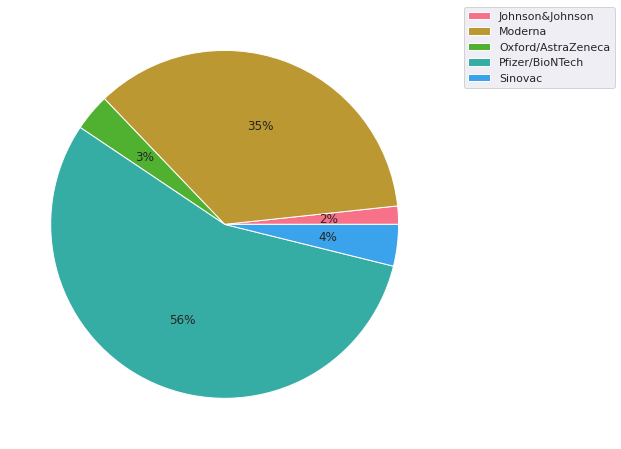

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

def do_pie_plot(x,y):
  plt.figure(figsize = (10,8))
  sns.set(style="darkgrid")
  colors = sns.color_palette('husl')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return


x = manu_tot.index.tolist()
y = manu_tot
do_pie_plot(x,y)

This is an interesting data set and I would like to visulaize what the world wide data looks like on an actual map.

I am planning to use geopandas. Hopefully, it should work.

In [91]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 46.8 MB/s 
     |████████████████████████████████| 16.7 MB 40.4 MB/s 


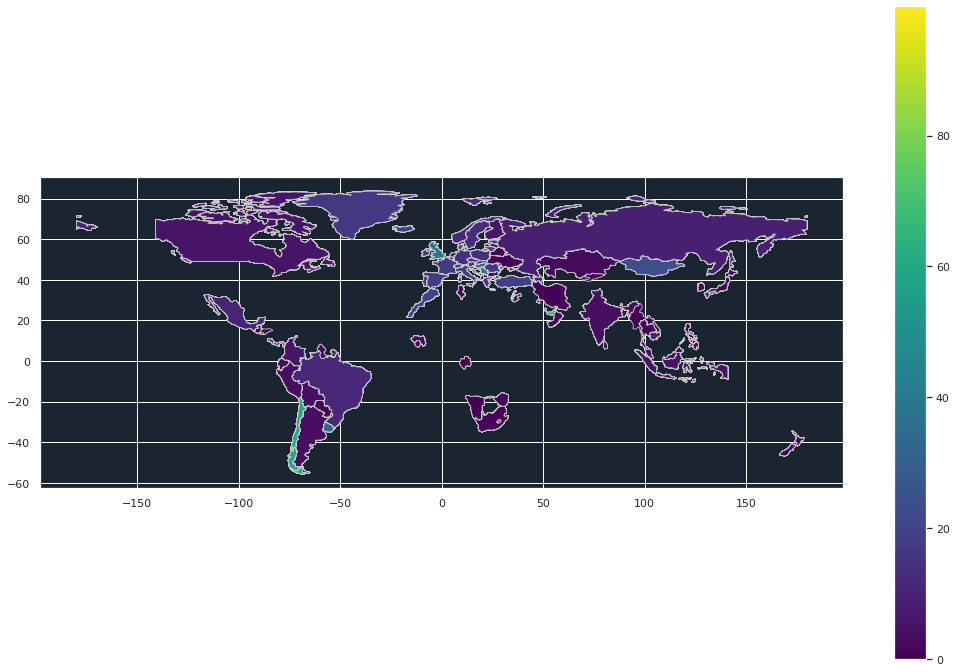

In [92]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Task Total vaccinated in the world

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.name
merged = world.set_index('name').join(country_data.set_index('country'))
variable = 'people_fully_vaccinated_per_hundred'

vmin = country_data[variable].min()
vmax = country_data[variable].max()

f, ax = plt.subplots(1, figsize=(18, 12))
ax.set_facecolor('xkcd:dark')
merged.plot(column=variable, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = f.colorbar(sm)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))


I can now see the people_fully_vaccinated_per_hundred in the world map. We can repeat this for any column. Just change the variable name to the column of interest.

### Exercise 8 - encode daily vaccinations 

1. find the median daily vaccinations per 1 million 
2. write a function to encode daily vaccinations per 1 million, where values greater than or equal to median = 1 and values less than median = 0 

Output: 

1. 1915.5
2. 
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: daily_vaccinations_per_million, Length: 9011, dtype: int64
```

### Exercise 9 - Encoding vaccinations per hundred  
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. find the minimum total vaccinations for the United Kingdom 
2. save this value in a variable rounded down to an integer
3. write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
4. display the countries which total vaccinated is at the same rate or more than the UK

Output:

1. 1402432.0
2. 1402432
3. `df['people_vaccinated_per_hundred']` should output:
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: total_vaccinations, Length: 9011, dtype: int64
```
4. 
```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)
```




### Exercise 10 - create new series of total vaccinations percentages
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`  
  


1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


Output:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



# Reflection
----

## What skills have you demonstrated in completing this notebook?

It was a fun worksheet to work with. I got to practice my data retreival, cleaning, grouping, sorting and aggregating, try out using new skills like encoding columns.



## What caused you the most difficulty?

Nothing really. It was fairly straight forward. 